In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
disease = pd.read_csv('inf_dis.csv')

In [339]:
disease.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI. lower,CI.upper,Unstable
0,Amebiasis,Solano,2005,Total,0,410570,0.000,0.000,0.898,-
1,Amebiasis,Marin,2005,Male,4,121710,3.287,0.895,8.415,*
2,Amebiasis,Kern,2010,Female,1,404863,0.247,0.006,1.376,*
3,Amebiasis,Tulare,2001,Female,1,186935,0.535,0.014,2.980,*
4,Amebiasis,Los Angeles,2014,Female,17,5127242,0.332,0.193,0.531,*


In [340]:
disease.Year.isnull().sum()

0

In [341]:
disease['Year'] = disease['Year'].astype(int)
disease['Year'].head()

0    2005
1    2005
2    2010
3    2001
4    2014
Name: Year, dtype: int32

In [342]:
disease['County'].unique()

array(['Solano', 'Marin', 'Kern', 'Tulare', 'Los Angeles', 'Napa',
       'Mariposa', 'Shasta', 'Sutter', 'Lake', 'Ventura', 'Sierra',
       'Mono', 'Madera', 'Santa Barbara', 'Inyo', 'Sonoma',
       'San Bernardino', 'Kings', 'Tehama', 'Tuolumne', 'Yuba',
       'San Mateo', 'Monterey', 'San Benito', 'Nevada', 'Santa Clara',
       'Merced', 'Plumas', 'Stanislaus', 'Trinity', 'San Francisco',
       'Yolo', 'Lassen', 'Mendocino', 'Sacramento', 'Placer',
       'Santa Cruz', 'Orange', 'San Diego', 'Riverside', 'Modoc',
       'Siskiyou', 'San Luis Obispo', 'Imperial', 'Humboldt',
       'San Joaquin', 'Alpine', 'Alameda', 'Amador', 'Contra Costa',
       'California', 'Calaveras', 'Glenn', 'Butte', 'El Dorado', 'Fresno',
       'Del Norte', 'Colusa'], dtype=object)

In [343]:
disease['County'].nunique()

59

In [344]:
disease.sort_values('County').head()

,Disease,County,Year,Sex,Count,Population,Rate,CI. lower,CI.upper,Unstable
103455,Shiga Toxin Positive Feces (without culture co...,Alameda,2015,Total,2,1619679,0.123,0.015,0.446,*
89171,Psittacosis,Alameda,2004,Female,0,746723,0.000,0.000,0.494,-
109309,Spotted Fever Rickettsiosis,Alameda,2005,Total,0,1459882,0.000,0.000,0.253,-
37862,Cysticercosis or Taeniasis,Alameda,2005,Male,2,716004,0.279,0.034,1.009,*
32245,Creutzfeldt-Jakob Disease and other Transmissi...,Alameda,2009,Total,1,1503827,0.066,0.002,0.370,*


In [345]:
disease['County'] = disease['County'].str.strip(' ')
disease.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI. lower,CI.upper,Unstable
0,Amebiasis,Solano,2005,Total,0,410570,0.000,0.000,0.898,-
1,Amebiasis,Marin,2005,Male,4,121710,3.287,0.895,8.415,*
2,Amebiasis,Kern,2010,Female,1,404863,0.247,0.006,1.376,*
3,Amebiasis,Tulare,2001,Female,1,186935,0.535,0.014,2.980,*
4,Amebiasis,Los Angeles,2014,Female,17,5127242,0.332,0.193,0.531,*


In [346]:
disease['County'].unique()

array(['Solano', 'Marin', 'Kern', 'Tulare', 'Los Angeles', 'Napa',
       'Mariposa', 'Shasta', 'Sutter', 'Lake', 'Ventura', 'Sierra',
       'Mono', 'Madera', 'Santa Barbara', 'Inyo', 'Sonoma',
       'San Bernardino', 'Kings', 'Tehama', 'Tuolumne', 'Yuba',
       'San Mateo', 'Monterey', 'San Benito', 'Nevada', 'Santa Clara',
       'Merced', 'Plumas', 'Stanislaus', 'Trinity', 'San Francisco',
       'Yolo', 'Lassen', 'Mendocino', 'Sacramento', 'Placer',
       'Santa Cruz', 'Orange', 'San Diego', 'Riverside', 'Modoc',
       'Siskiyou', 'San Luis Obispo', 'Imperial', 'Humboldt',
       'San Joaquin', 'Alpine', 'Alameda', 'Amador', 'Contra Costa',
       'California', 'Calaveras', 'Glenn', 'Butte', 'El Dorado', 'Fresno',
       'Del Norte', 'Colusa'], dtype=object)

In [347]:
gdp = pd.read_excel('gdp.xlsx',sheet_name='Real GDP')
gdp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,FIPS,Countyname,Postal,LineCode,IndustryName,Real Gross domestic product (GDP) by county,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,(thousands of chained 2012 dollars),NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,2012,2013,2014,2015
3,01001,Autauga,AL,1,All Industries,1383941,1322416,1312668,1412939
4,01001,Autauga,AL,2,Private goods-producing industries,286396,299115,310672,325250


In [348]:
gdp.rename(columns={"Unnamed: 0":"FIPS", "Unnamed: 1":"County", "Unnamed: 2":"Postal", "Unnamed: 3":"LineCode", "Unnamed: 4":"IndustryName", "Unnamed: 5":"2012", "Unnamed: 6":"2013","Unnamed: 7":"2014", "Unnamed: 8":"2015"}, inplace=True)

In [349]:
gdp1 = gdp.loc[3:,:]
gdp1.head()

,FIPS,County,Postal,LineCode,IndustryName,2012,2013,2014,2015
3,01001,Autauga,AL,1,All Industries,1383941,1322416,1312668,1412939
4,01001,Autauga,AL,2,Private goods-producing industries,286396,299115,310672,325250
5,01001,Autauga,AL,3,Private services-providing industries,948490,880098,861153,946148
6,01001,Autauga,AL,4,Government and government enterprises,149055,143062,140893,141294
7,01003,Baldwin,AL,1,All Industries,5599194,6218819,6247887,5981958


In [350]:
gdp_l = gdp1[gdp1['LineCode']==1]
gdp_l.drop(['FIPS','LineCode','IndustryName'],axis=1,inplace=True)
gdp_l.head()

C:\Users\aufst\OneDrive\Music\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,County,Postal,2012,2013,2014,2015
3,Autauga,AL,1383941,1322416,1312668,1412939
7,Baldwin,AL,5599194,6218819,6247887,5981958
11,Barbour,AL,639833,687532,663462,708778
15,Bibb,AL,297560,314380,305472,291780
19,Blount,AL,632761,683949,661352,778131


In [351]:
gdp_last = pd.melt(gdp_l,id_vars=['County','Postal'], var_name='Year', value_name='GDP')
gdp_last.head()

,County,Postal,Year,GDP
0,Autauga,AL,2012,1383941
1,Baldwin,AL,2012,5599194
2,Barbour,AL,2012,639833
3,Bibb,AL,2012,297560
4,Blount,AL,2012,632761


In [352]:
gdp_last[gdp_last['County']=='Baldwin'].head()

,County,Postal,Year,GDP
1,Baldwin,AL,2012,5599194
391,Baldwin,GA,2012,1106089
3114,Baldwin,AL,2013,6218819
3504,Baldwin,GA,2013,1053999
6227,Baldwin,AL,2014,6247887


In [353]:
gdp_last['County'] = gdp_last['County'].str.strip(' ')
gdp_last.head()

,County,Postal,Year,GDP
0,Autauga,AL,2012,1383941
1,Baldwin,AL,2012,5599194
2,Barbour,AL,2012,639833
3,Bibb,AL,2012,297560
4,Blount,AL,2012,632761


In [354]:
gdp_last.Year.isnull().sum()

0

In [355]:
gdp_last['Year'] = gdp_last['Year'].astype(int)
gdp_last['Year'].head()

0    2012
1    2012
2    2012
3    2012
4    2012
Name: Year, dtype: int32

In [356]:
gdp_ca = gdp_last[gdp_last['Postal']=='CA']
gdp_ca.head()

,County,Postal,Year,GDP
186,Alameda,CA,2012,93795276
187,Alpine,CA,2012,91253
188,Amador,CA,2012,1106242
189,Butte,CA,2012,6399648
190,Calaveras,CA,2012,771457


In [357]:
gdp_ca['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [358]:
gdp_ca['County'].nunique()

58

In [359]:
gdpca = gdp_last.drop('Postal',axis=1)
gdpca.head()

,County,Year,GDP
0,Autauga,2012,1383941
1,Baldwin,2012,5599194
2,Barbour,2012,639833
3,Bibb,2012,297560
4,Blount,2012,632761


In [360]:
grow = pd.read_excel('gdp.xlsx',sheet_name='Real GDP Growth')

In [361]:
grow.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,FIPS,Countyname,Postal,LineCode,IndustryName,Real Gross domestic product (GDP) by county gr...,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,(percent change from preceding period),NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,2013,2014,2015
3,01001,Autauga,AL,1,All Industries,-4.4,-0.7,7.6
4,01001,Autauga,AL,2,Private goods-producing industries,4.4,3.9,4.7


In [362]:
grow.rename(columns={"Unnamed: 0":"FIPS", "Unnamed: 1":"County", "Unnamed: 2":"Postal", "Unnamed: 3":"LineCode", "Unnamed: 4":"IndustryName", "Unnamed: 5":"2013","Unnamed: 6":"2014", "Unnamed: 7":"2015"}, inplace=True)
grow.head()

,FIPS,County,Postal,LineCode,IndustryName,2013,2014,2015
0,FIPS,Countyname,Postal,LineCode,IndustryName,Real Gross domestic product (GDP) by county gr...,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,(percent change from preceding period),NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,2013,2014,2015
3,01001,Autauga,AL,1,All Industries,-4.4,-0.7,7.6
4,01001,Autauga,AL,2,Private goods-producing industries,4.4,3.9,4.7


In [363]:
growth = grow.iloc[3:,:]
growth.head()

,FIPS,County,Postal,LineCode,IndustryName,2013,2014,2015
3,01001,Autauga,AL,1,All Industries,-4.4,-0.7,7.6
4,01001,Autauga,AL,2,Private goods-producing industries,4.4,3.9,4.7
5,01001,Autauga,AL,3,Private services-providing industries,-7.2,-2.2,9.9
6,01001,Autauga,AL,4,Government and government enterprises,-4,-1.5,0.3
7,01003,Baldwin,AL,1,All Industries,11.1,0.5,-4.3


In [364]:
growth_l = growth[growth['LineCode']==1]
growth_l.drop(['FIPS','LineCode','IndustryName'],axis=1,inplace=True)
growth_l.head()

,County,Postal,2013,2014,2015
3,Autauga,AL,-4.4,-0.7,7.6
7,Baldwin,AL,11.1,0.5,-4.3
11,Barbour,AL,7.5,-3.5,6.8
15,Bibb,AL,5.7,-2.8,-4.5
19,Blount,AL,8.1,-3.3,17.7


In [365]:
growth_ca = pd.melt(growth_l,id_vars=['County','Postal'],var_name='Year',value_name='GDPgrowth')
growth_ca.head()

,County,Postal,Year,GDPgrowth
0,Autauga,AL,2013,-4.4
1,Baldwin,AL,2013,11.1
2,Barbour,AL,2013,7.5
3,Bibb,AL,2013,5.7
4,Blount,AL,2013,8.1


In [366]:
groca = growth_ca[growth_ca['Postal']=='CA']
groca.head()

,County,Postal,Year,GDPgrowth
186,Alameda,CA,2013,4.1
187,Alpine,CA,2013,-11.8
188,Amador,CA,2013,4.5
189,Butte,CA,2013,3.9
190,Calaveras,CA,2013,1.9


In [367]:
groca['County'].str.strip(' ')
groca.head()

,County,Postal,Year,GDPgrowth
186,Alameda,CA,2013,4.1
187,Alpine,CA,2013,-11.8
188,Amador,CA,2013,4.5
189,Butte,CA,2013,3.9
190,Calaveras,CA,2013,1.9


In [368]:
groca['Year'] = groca['Year'].astype(int)
groca['Year'].head()

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


186    2013
187    2013
188    2013
189    2013
190    2013
Name: Year, dtype: int32

In [369]:
groca['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [370]:
groca['County'].nunique()

58

In [371]:
growthca = groca.drop('Postal',axis=1)
growthca.head()

,County,Year,GDPgrowth
186,Alameda,2013,4.1
187,Alpine,2013,-11.8
188,Amador,2013,4.5
189,Butte,2013,3.9
190,Calaveras,2013,1.9


In [372]:
unemp = pd.read_excel('unemployment.xls',sheet_name='Unemployment Med HH Inc',skiprows=range(0,7))

In [373]:
unemp.rename(columns={"Area_name":"County"}, inplace=True)
unemp.iloc[69:102,:4].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013
69,2000,AK,Alaska,NaN
70,2013,AK,"Aleutians East Borough, AK",9.0
71,2016,AK,"Aleutians West Census Area, AK",9.0
72,2020,AK,"Anchorage Borough/municipality, AK",2.0
73,2050,AK,"Bethel Census Area, AK",7.0


In [374]:
unemp[unemp['County'].str.contains(',')].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,58343.0,121.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56607.0,117.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32490.0,67.4
5,1007,AL,"Bibb County, AL",1.0,1.0,1.0,8791.0,8432.0,359.0,4.1,...,8607.0,8050.0,557.0,6.5,8506.0,8133.0,373.0,4.4,45795.0,95.0
6,1009,AL,"Blount County, AL",1.0,1.0,1.0,26629.0,25780.0,849.0,3.2,...,24576.0,23248.0,1328.0,5.4,24494.0,23509.0,985.0,4.0,48253.0,100.1


In [375]:
unemp[unemp['County'].str.contains('/')].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
72,2020,AK,"Anchorage Borough/municipality, AK",2.0,2.0,1.0,151051.0,143336.0,7715.0,5.1,...,155798.0,147142.0,8656.0,5.6,155462.0,146175.0,9287.0,6.0,78579.0,106.1
80,2110,AK,"Juneau Borough/city, AK",5.0,8.0,0.0,18459.0,17626.0,833.0,4.5,...,17372.0,16587.0,785.0,4.5,17435.0,16607.0,828.0,4.7,90436.0,122.1
93,2220,AK,"Sitka Borough/city, AK",7.0,11.0,0.0,4635.0,4398.0,237.0,5.1,...,4380.0,4176.0,204.0,4.7,4449.0,4241.0,208.0,4.7,69501.0,93.8
98,2275,AK,"Wrangell Borough/city, AK",9.0,12.0,0.0,NaN,NaN,NaN,NaN,...,1056.0,976.0,80.0,7.6,1050.0,969.0,81.0,7.7,55696.0,75.2
100,2282,AK,"Yakutat Borough/city, AK",9.0,12.0,0.0,308.0,287.0,21.0,6.8,...,245.0,224.0,21.0,8.6,235.0,213.0,22.0,9.4,59955.0,81.0


In [376]:
unemp[unemp['County'].str.contains('County')].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,58343.0,121.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56607.0,117.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32490.0,67.4
5,1007,AL,"Bibb County, AL",1.0,1.0,1.0,8791.0,8432.0,359.0,4.1,...,8607.0,8050.0,557.0,6.5,8506.0,8133.0,373.0,4.4,45795.0,95.0
6,1009,AL,"Blount County, AL",1.0,1.0,1.0,26629.0,25780.0,849.0,3.2,...,24576.0,23248.0,1328.0,5.4,24494.0,23509.0,985.0,4.0,48253.0,100.1


In [377]:
unemp['County'] = unemp['County'].apply(lambda x:x.split(',')[0])
unemp.head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,158921892.0,151183680.0,7738212.0,4.9,160588515.0,153594100.0,6994415.0,4.4,60336.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2173175.0,2045624.0,127551.0,5.9,2168444.0,2073106.0,95338.0,4.4,48193.0,100.0
2,1001,AL,Autauga County,2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,58343.0,121.1
3,1003,AL,Baldwin County,3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56607.0,117.5
4,1005,AL,Barbour County,6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32490.0,67.4


In [378]:
unemp.iloc[:,:10].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0
2,1001,AL,Autauga County,2.0,2.0,1.0,24383.0,23577.0,806.0,3.3
3,1003,AL,Baldwin County,3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1
4,1005,AL,Barbour County,6.0,6.0,0.0,10334.0,9684.0,650.0,6.3


In [379]:
unemp['County'] = unemp['County'].apply(lambda x:x.split('County')[0])
unemp.head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,158921892.0,151183680.0,7738212.0,4.9,160588515.0,153594100.0,6994415.0,4.4,60336.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2173175.0,2045624.0,127551.0,5.9,2168444.0,2073106.0,95338.0,4.4,48193.0,100.0
2,1001,AL,Autauga,2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,58343.0,121.1
3,1003,AL,Baldwin,3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56607.0,117.5
4,1005,AL,Barbour,6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32490.0,67.4


In [380]:
unemp[unemp['State'] != 'PR'].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,158921892.0,151183680.0,7738212.0,4.9,160588515.0,153594100.0,6994415.0,4.4,60336.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2173175.0,2045624.0,127551.0,5.9,2168444.0,2073106.0,95338.0,4.4,48193.0,100.0
2,1001,AL,Autauga,2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,58343.0,121.1
3,1003,AL,Baldwin,3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56607.0,117.5
4,1005,AL,Barbour,6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32490.0,67.4


In [381]:
unemp['County'] = unemp['County'].apply(lambda x:x.split('/')[0])
unemp_l = unemp.loc[2:,:]
unemp_l.head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
2,1001,AL,Autauga,2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,58343.0,121.1
3,1003,AL,Baldwin,3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56607.0,117.5
4,1005,AL,Barbour,6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32490.0,67.4
5,1007,AL,Bibb,1.0,1.0,1.0,8791.0,8432.0,359.0,4.1,...,8607.0,8050.0,557.0,6.5,8506.0,8133.0,373.0,4.4,45795.0,95.0
6,1009,AL,Blount,1.0,1.0,1.0,26629.0,25780.0,849.0,3.2,...,24576.0,23248.0,1328.0,5.4,24494.0,23509.0,985.0,4.0,48253.0,100.1


In [382]:
unemp[unemp['State']=='CA'].head()

,FIPStxt,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
194,6000,CA,California,NaN,NaN,NaN,17893080.0,16931590.0,961490.0,5.4,...,19093658.0,18048827.0,1044831.0,5.5,19311958.0,18393077.0,918881.0,4.8,71785.0,100.0
195,6001,CA,Alameda,1.0,1.0,1.0,745198.0,710144.0,35054.0,4.7,...,837583.0,801774.0,35809.0,4.3,848335.0,817433.0,30902.0,3.6,95550.0,133.1
196,6003,CA,Alpine,8.0,4.0,0.0,493.0,454.0,39.0,7.9,...,557.0,521.0,36.0,6.5,538.0,505.0,33.0,6.1,55755.0,77.7
197,6005,CA,Amador,6.0,4.0,0.0,17703.0,16675.0,1028.0,5.8,...,14574.0,13706.0,868.0,6.0,14783.0,14059.0,724.0,4.9,60588.0,84.4
198,6007,CA,Butte,3.0,2.0,1.0,101228.0,94489.0,6739.0,6.7,...,101987.0,95246.0,6741.0,6.6,102982.0,97066.0,5916.0,5.7,48634.0,67.7


In [383]:
unemp2 = unemp_l.drop(['FIPStxt','Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013','Civilian_labor_force_2007','Employed_2007','Unemployed_2007','Civilian_labor_force_2008','Employed_2008','Unemployed_2008','Civilian_labor_force_2009','Employed_2009','Unemployed_2009','Civilian_labor_force_2010','Employed_2010','Unemployed_2010','Civilian_labor_force_2010','Employed_2010','Unemployed_2010','Civilian_labor_force_2011','Employed_2011','Unemployed_2011','Civilian_labor_force_2012','Employed_2012','Unemployed_2012','Civilian_labor_force_2013','Employed_2013','Unemployed_2013','Civilian_labor_force_2014','Employed_2014','Unemployed_2014','Civilian_labor_force_2015','Employed_2015','Unemployed_2015','Civilian_labor_force_2016','Employed_2016','Unemployed_2016','Civilian_labor_force_2017','Employed_2017','Unemployed_2017'],axis=1)
unemp2.head()

,State,County,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
2,AL,Autauga,3.3,5.1,9.7,8.9,8.4,6.9,6.2,5.8,5.2,5.1,3.9,58343.0,121.1
3,AL,Baldwin,3.1,4.6,9.8,10.0,9.0,7.5,6.6,6.1,5.5,5.4,4.0,56607.0,117.5
4,AL,Barbour,6.3,8.8,14.3,12.3,11.5,11.5,10.2,10.5,8.9,8.4,5.9,32490.0,67.4
5,AL,Bibb,4.1,5.8,13.3,11.4,10.5,8.5,7.9,7.2,6.6,6.5,4.4,45795.0,95.0
6,AL,Blount,3.2,4.7,10.0,9.8,8.7,6.9,6.3,6.1,5.4,5.4,4.0,48253.0,100.1


In [384]:
unemp2.rename(columns={"State":"Postal"},inplace=True)

In [385]:
unemp2.drop(['Median_Household_Income_2017','Med_HH_Income_Percent_of_State_Total_2017'],axis=1).head()

,Postal,County,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017
2,AL,Autauga,3.3,5.1,9.7,8.9,8.4,6.9,6.2,5.8,5.2,5.1,3.9
3,AL,Baldwin,3.1,4.6,9.8,10.0,9.0,7.5,6.6,6.1,5.5,5.4,4.0
4,AL,Barbour,6.3,8.8,14.3,12.3,11.5,11.5,10.2,10.5,8.9,8.4,5.9
5,AL,Bibb,4.1,5.8,13.3,11.4,10.5,8.5,7.9,7.2,6.6,6.5,4.4
6,AL,Blount,3.2,4.7,10.0,9.8,8.7,6.9,6.3,6.1,5.4,5.4,4.0


In [386]:
unemp_ca = unemp2[unemp2['Postal'] == 'CA'].iloc[1:,:]
unemp_ca.head()

,Postal,County,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
195,CA,Alameda,4.7,6.2,10.3,10.9,10.1,8.7,7.2,5.8,4.7,4.3,3.6,95550.0,133.1
196,CA,Alpine,7.9,10.5,14.1,12.9,12.8,11.2,9.7,8.2,7.3,6.5,6.1,55755.0,77.7
197,CA,Amador,5.8,7.7,11.4,14.1,13.6,12.3,10.3,8.3,6.6,6.0,4.9,60588.0,84.4
198,CA,Butte,6.7,8.5,12.3,13.9,13.7,12.2,10.3,8.6,7.2,6.6,5.7,48634.0,67.7
199,CA,Calaveras,6.4,8.7,13.6,14.4,14.0,12.4,9.9,8.0,6.4,5.7,4.7,58536.0,81.5


In [387]:
unempca = pd.melt(unemp_ca,id_vars=['County','Postal'],var_name='Year',value_name='UnemploymentRate')
unempca.head()

,County,Postal,Year,UnemploymentRate
0,Alameda,CA,Unemployment_rate_2007,4.7
1,Alpine,CA,Unemployment_rate_2007,7.9
2,Amador,CA,Unemployment_rate_2007,5.8
3,Butte,CA,Unemployment_rate_2007,6.7
4,Calaveras,CA,Unemployment_rate_2007,6.4


In [388]:
unempca['Year'] = unempca['Year'].str.strip().str[-4:]

In [389]:
unempca['Year'].head()

0    2007
1    2007
2    2007
3    2007
4    2007
Name: Year, dtype: object

In [390]:
unempca.tail()

,County,Postal,Year,UnemploymentRate
749,Tulare,CA,2017,64.6
750,Tuolumne,CA,2017,81.9
751,Ventura,CA,2017,114.8
752,Yolo,CA,2017,90.4
753,Yuba,CA,2017,75.0


In [391]:
unempca['County'].str.strip(' ')
unempca.head(10)

,County,Postal,Year,UnemploymentRate
0,Alameda,CA,2007,4.7
1,Alpine,CA,2007,7.9
2,Amador,CA,2007,5.8
3,Butte,CA,2007,6.7
4,Calaveras,CA,2007,6.4
5,Colusa,CA,2007,11.8
6,Contra Costa,CA,2007,4.7
7,Del Norte,CA,2007,7.5
8,El Dorado,CA,2007,5.2
9,Fresno,CA,2007,8.6


In [392]:
unempca['County'].unique()

array(['Alameda ', 'Alpine ', 'Amador ', 'Butte ', 'Calaveras ',
       'Colusa ', 'Contra Costa ', 'Del Norte ', 'El Dorado ', 'Fresno ',
       'Glenn ', 'Humboldt ', 'Imperial ', 'Inyo ', 'Kern ', 'Kings ',
       'Lake ', 'Lassen ', 'Los Angeles ', 'Madera ', 'Marin ',
       'Mariposa ', 'Mendocino ', 'Merced ', 'Modoc ', 'Mono ',
       'Monterey ', 'Napa ', 'Nevada ', 'Orange ', 'Placer ', 'Plumas ',
       'Riverside ', 'Sacramento ', 'San Benito ', 'San Bernardino ',
       'San Diego ', 'San Francisco ', 'San Joaquin ', 'San Luis Obispo ',
       'San Mateo ', 'Santa Barbara ', 'Santa Clara ', 'Santa Cruz ',
       'Shasta ', 'Sierra ', 'Siskiyou ', 'Solano ', 'Sonoma ',
       'Stanislaus ', 'Sutter ', 'Tehama ', 'Trinity ', 'Tulare ',
       'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '], dtype=object)

In [393]:
unempca['County'].nunique()

58

In [394]:
unempcaF = unempca.drop('Postal',axis=1)
unempcaF.head()

,County,Year,UnemploymentRate
0,Alameda,2007,4.7
1,Alpine,2007,7.9
2,Amador,2007,5.8
3,Butte,2007,6.7
4,Calaveras,2007,6.4


In [395]:
groca.head()

,County,Postal,Year,GDPgrowth
186,Alameda,CA,2013,4.1
187,Alpine,CA,2013,-11.8
188,Amador,CA,2013,4.5
189,Butte,CA,2013,3.9
190,Calaveras,CA,2013,1.9


In [396]:
gg= pd.merge(gdp_ca,groca,on=['County','Year','Postal'])
gg.head()

,County,Postal,Year,GDP,GDPgrowth
0,Alameda,CA,2013,97646410,4.1
1,Alpine,CA,2013,80465,-11.8
2,Amador,CA,2013,1155937,4.5
3,Butte,CA,2013,6647096,3.9
4,Calaveras,CA,2013,786451,1.9


In [397]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 5 columns):
County       174 non-null object
Postal       174 non-null object
Year         174 non-null int32
GDP          174 non-null object
GDPgrowth    174 non-null object
dtypes: int32(1), object(4)
memory usage: 7.5+ KB


In [398]:
unempca['Year'] = unempca['Year'].astype(int)

In [399]:
gg['County'] = gg['County'].str.strip(' ')

In [400]:
unempca['County'] = unempca['County'].str.strip(' ')

In [401]:
unempca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 4 columns):
County              754 non-null object
Postal              754 non-null object
Year                754 non-null int32
UnemploymentRate    754 non-null float64
dtypes: float64(1), int32(1), object(2)
memory usage: 20.7+ KB


In [402]:
unempca.head()

,County,Postal,Year,UnemploymentRate
0,Alameda,CA,2007,4.7
1,Alpine,CA,2007,7.9
2,Amador,CA,2007,5.8
3,Butte,CA,2007,6.7
4,Calaveras,CA,2007,6.4


In [403]:
unempca[unempca['County']=='Alameda']

,County,Postal,Year,UnemploymentRate
0,Alameda,CA,2007,4.7
58,Alameda,CA,2008,6.2
116,Alameda,CA,2009,10.3
174,Alameda,CA,2010,10.9
232,Alameda,CA,2011,10.1
290,Alameda,CA,2012,8.7
348,Alameda,CA,2013,7.2
406,Alameda,CA,2014,5.8
464,Alameda,CA,2015,4.7
522,Alameda,CA,2016,4.3


In [404]:
unempca[unempca['Postal']=='CA'].head()

,County,Postal,Year,UnemploymentRate
0,Alameda,CA,2007,4.7
1,Alpine,CA,2007,7.9
2,Amador,CA,2007,5.8
3,Butte,CA,2007,6.7
4,Calaveras,CA,2007,6.4


In [405]:
gg.head()

,County,Postal,Year,GDP,GDPgrowth
0,Alameda,CA,2013,97646410,4.1
1,Alpine,CA,2013,80465,-11.8
2,Amador,CA,2013,1155937,4.5
3,Butte,CA,2013,6647096,3.9
4,Calaveras,CA,2013,786451,1.9


In [406]:
ggu = pd.merge(gg,unempca, how='left', on=['Year','Postal','County'])
ggu.head()

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate
0,Alameda,CA,2013,97646410,4.1,7.2
1,Alpine,CA,2013,80465,-11.8,9.7
2,Amador,CA,2013,1155937,4.5,10.3
3,Butte,CA,2013,6647096,3.9,10.3
4,Calaveras,CA,2013,786451,1.9,9.9


In [407]:
unempca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 4 columns):
County              754 non-null object
Postal              754 non-null object
Year                754 non-null int32
UnemploymentRate    754 non-null float64
dtypes: float64(1), int32(1), object(2)
memory usage: 20.7+ KB


In [408]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 5 columns):
County       174 non-null object
Postal       174 non-null object
Year         174 non-null int32
GDP          174 non-null object
GDPgrowth    174 non-null object
dtypes: int32(1), object(4)
memory usage: 7.5+ KB


In [409]:
gg.head()

,County,Postal,Year,GDP,GDPgrowth
0,Alameda,CA,2013,97646410,4.1
1,Alpine,CA,2013,80465,-11.8
2,Amador,CA,2013,1155937,4.5
3,Butte,CA,2013,6647096,3.9
4,Calaveras,CA,2013,786451,1.9


In [410]:
ggud = pd.merge(ggu,disease,on=['County','Year'])
ggud.head()
# *** after merge the disease set, i have duplicate entries for gdp, 
# gdpgrowth, and unemployment rate  

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate,Disease,Sex,Count,Population,Rate,CI. lower,CI.upper,Unstable
0,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Female,5,803669,0.622,0.202,1.452,*
1,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Male,7,772128,0.907,0.364,1.868,*
2,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Total,12,1575797,0.762,0.393,1.330,*
3,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Male,0,772128,0.000,0.000,0.478,-
4,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Total,0,1575797,0.000,0.000,0.234,-


In [411]:
ggud1 = ggud.drop(['CI. lower','CI.upper'],axis=1)

In [412]:
ggud1.head()

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate,Disease,Sex,Count,Population,Rate,Unstable
0,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Female,5,803669,0.622,*
1,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Male,7,772128,0.907,*
2,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Total,12,1575797,0.762,*
3,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Male,0,772128,0.000,-
4,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Total,0,1575797,0.000,-


In [413]:
ggud1.head(20)
# duplicate entries for economic factors

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate,Disease,Sex,Count,Population,Rate,Unstable
0,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Female,5,803669,0.622,*
1,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Male,7,772128,0.907,*
2,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Total,12,1575797,0.762,*
3,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Male,0,772128,0.000,-
4,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Total,0,1575797,0.000,-
5,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Female,0,803669,0.000,-
6,Alameda,CA,2013,97646410,4.1,7.2,Anthrax,Male,0,772128,0.000,-
7,Alameda,CA,2013,97646410,4.1,7.2,Anthrax,Total,0,1575797,0.000,-
8,Alameda,CA,2013,97646410,4.1,7.2,Anthrax,Female,0,803669,0.000,-
9,Alameda,CA,2013,97646410,4.1,7.2,Babesiosis,Male,0,772128,0.000,-


In [414]:
ggu.head()

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate
0,Alameda,CA,2013,97646410,4.1,7.2
1,Alpine,CA,2013,80465,-11.8,9.7
2,Amador,CA,2013,1155937,4.5,10.3
3,Butte,CA,2013,6647096,3.9,10.3
4,Calaveras,CA,2013,786451,1.9,9.9


Text(0, 0.5, 'Frequency')

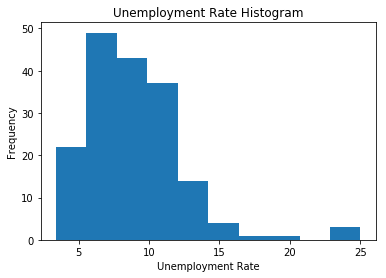

In [415]:
#n_data = len(ggu.UnemploymentRate)
#n_bins = np.sqrt(n_data)
#n_bins = int(n_bins)

# can't do histograms of counties either, too many counties 
plt.hist(ggu['UnemploymentRate'])
plt.title('Unemployment Rate Histogram')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
# right skewed distribution with a mean interval >5 and <12



# should i look into the outliers
# qq plot, residual test, normality 
# run bootstrap and hypothesis test on all features

In [416]:
ggu.UnemploymentRate.mean()

8.917241379310344

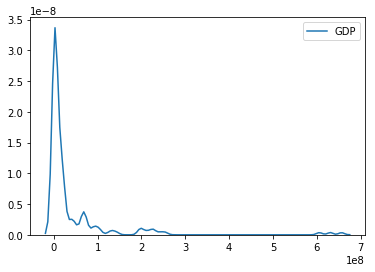

In [417]:
sns.kdeplot(ggu.GDP)

Text(0, 0.5, 'Frequency')

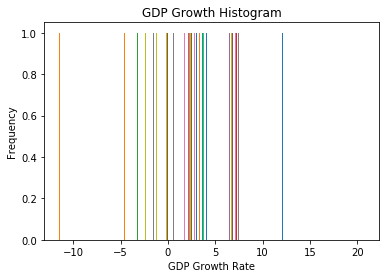

In [418]:
# n_d = len(ggu.GDPgrowth)
# n_b = np.sqrt(n_d)
# n_b = int(n_b)

plt.hist(ggu['GDPgrowth'])
plt.title('GDP Growth Histogram')
plt.xlabel('GDP Growth Rate')
plt.ylabel('Frequency')


In [465]:
np.mean(ggu.GDPgrowth)
# mean interval >-5 and <7

3.0419540229885054

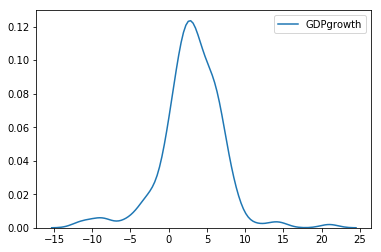

In [419]:
sns.kdeplot(ggu.GDPgrowth)
# approx. normal 

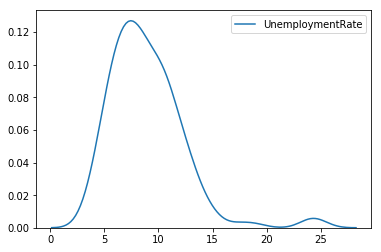

In [420]:
import seaborn as sns
sns.kdeplot(ggu.UnemploymentRate)
# right skewed

In [421]:
import scipy.stats as sy
sy.anderson(ggu.UnemploymentRate,'norm')
# reject
# do i check if the features and residuals are normally distributed

AndersonResult(statistic=2.874933829561826, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [422]:
pd.isna(ggu.GDP).sum()

0

In [423]:
igdp = ggu.GDP.astype(int)
igrowth = ggu.GDPgrowth.astype(int)
# reject

In [424]:
sy.anderson(igdp,'norm')
# reject

AndersonResult(statistic=31.91894698228765, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [425]:
sy.anderson(igrowth,'norm')
# reject
# economic factors are not all normally distributed 
# according to the anderson test,
# they all have stats > .05 critical values

AndersonResult(statistic=3.2151183710230953, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [426]:
sy.normaltest(ggu.UnemploymentRate)
# reject the null

NormaltestResult(statistic=75.64035723101034, pvalue=3.757553066602641e-17)

In [427]:
sy.normaltest(igrowth)

NormaltestResult(statistic=23.737477246867734, pvalue=7.006035098432238e-06)

In [428]:
sy.normaltest(igdp)

NormaltestResult(statistic=197.7591581186905, pvalue=1.1406290852812215e-43)

In [429]:
ggud1['Enc'] = pd.factorize(ggud1.Disease)[0]
ggud1.Enc.head()

0    0
1    0
2    0
3    1
4    1
Name: Enc, dtype: int64

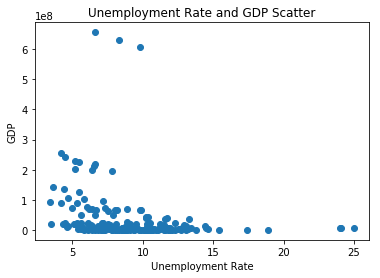

In [460]:
plt.scatter(ggu.UnemploymentRate,ggu.GDP)
plt.title('Unemployment Rate and GDP Scatter')
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP')
plt.show()

In [468]:
# pearson correlation
import scipy.stats as ss
ss.pearsonr(ggu.UnemploymentRate,ggu.GDP)
# p val says to reject the null that they are correlated 

(-0.22876904405085352, 0.0023950884492341955)

TypeError: cannot perform reduce with flexible type

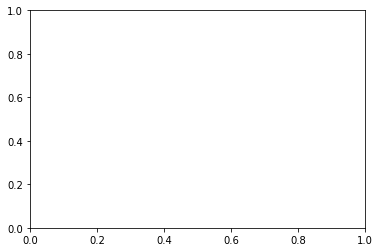

In [459]:
sns.boxplot(ggudnew.Disease)
# **************************

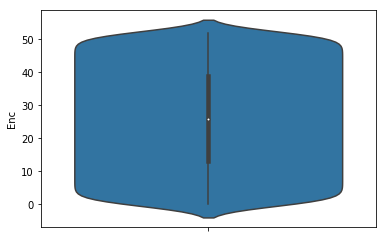

In [433]:
#sns.boxplot(ggud.Disease)
sns.violinplot(ggud1.Enc,orient='v')
# **********************************

In [434]:
# bootstrap
# hypothesis test
# methods for visualization
# preliminary techniques for eda
# plot categorical, // categorical and numerical
# pca
# log transform the data for visualization ??? 
# modeling with mixed features, what's the best way to find the distribution of your features?

# contingency table 
# one hot encoding 
# visual inspection
# standard error, 'outlier rule'
# contingency table
# mosaic plot *
# 5 number summary

In [435]:
ggu.head()

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate
0,Alameda,CA,2013,97646410,4.1,7.2
1,Alpine,CA,2013,80465,-11.8,9.7
2,Amador,CA,2013,1155937,4.5,10.3
3,Butte,CA,2013,6647096,3.9,10.3
4,Calaveras,CA,2013,786451,1.9,9.9


In [436]:
ggu.GDPgrowth.describe()

count     174.0
unique     92.0
top         2.0
freq        6.0
Name: GDPgrowth, dtype: float64

In [437]:
ggu.UnemploymentRate.describe()

count    174.000000
mean       8.917241
std        3.473174
min        3.400000
25%        6.600000
50%        8.450000
75%       10.500000
max       25.000000
Name: UnemploymentRate, dtype: float64

In [438]:
ggud1.head()

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate,Disease,Sex,Count,Population,Rate,Unstable,Enc
0,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Female,5,803669,0.622,*,0
1,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Male,7,772128,0.907,*,0
2,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Total,12,1575797,0.762,*,0
3,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Male,0,772128,0.000,-,1
4,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Total,0,1575797,0.000,-,1


In [457]:
ggudnew = ggud1[ggud1['Sex']!='Total']
ggudnew.head()

,County,Postal,Year,GDP,GDPgrowth,UnemploymentRate,Disease,Sex,Count,Population,Rate,Unstable,Enc
0,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Female,5,803669,0.622,*,0
1,Alameda,CA,2013,97646410,4.1,7.2,Amebiasis,Male,7,772128,0.907,*,0
3,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Male,0,772128,0.000,-,1
5,Alameda,CA,2013,97646410,4.1,7.2,Anaplasmosis and Ehrlichiosis,Female,0,803669,0.000,-,1
6,Alameda,CA,2013,97646410,4.1,7.2,Anthrax,Male,0,772128,0.000,-,2


TypeError: unsupported operand type(s) for +: 'int' and 'str'

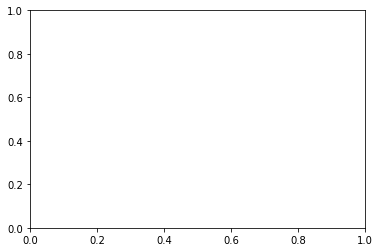

In [463]:
from statsmodels.graphics.mosaicplot import mosaic
mos_plot = mosaic(ggudnew.Disease, title='Disease Mosaic')
mos_plot
# ********************************************************
